# Random Shape in Blender

In [104]:
import math

In [105]:
# mesh arrays
verts = []
faces = []
edges = []
 
#3D supershape parameters
m = 14.23
a = -0.06
b = 2.78
n1 = 0.5
n2 = -.48
n3 = 1.5
 
scale = 3
 
Unum = 50
Vnum = 50
 
Uinc = math.pi / (Unum/2)
Vinc = (math.pi/2)/(Vnum/2)
 
#fill verts array
theta = -math.pi
for i in range (0, Unum + 1):
    phi = -math.pi/2
    r1 = 1/(((abs(math.cos(m*theta/4)/a))**n2+(abs(math.sin(m*theta/4)/b))**n3)**n1)
    for j in range(0,Vnum + 1):
        r2 = 1/(((abs(math.cos(m*phi/4)/a))**n2+(abs(math.sin(m*phi/4)/b))**n3)**n1)
        x = scale * (r1 * math.cos(theta) * r2 * math.cos(phi))
        y = scale * (r1 * math.sin(theta) * r2 * math.cos(phi))
        z = scale * (r2 * math.sin(phi))
 
        vert = (x,y,z) 
        verts.append(vert)
        #increment phi
        phi = phi + Vinc
    #increment theta
    theta = theta + Uinc
 
#fill faces array
count = 0
for i in range (0, (Vnum + 1) *(Unum)):
    if count < Vnum:
        A = i
        B = i+1
        C = (i+(Vnum+1))+1
        D = (i+(Vnum+1))
 
        face = (A,B,C,D)
        faces.append(face)
 
        count = count + 1
    else:
        count = 0

In [106]:
len(verts)

2601

In [107]:
len(edges)

0

In [108]:
len(faces)

2500

# Phrase Matching Algorithm

In [109]:
"""
Visualize Genetic Algorithm to match the target phrase.
Visit my tutorial website for more: https://mofanpy.com/tutorials/
"""
import numpy as np

TARGET_PHRASE = 'Veeramanohar'       # target DNA
POP_SIZE = 300                      # population size
CROSS_RATE = 0.4                    # mating probability (DNA crossover)
MUTATION_RATE = 0.01                # mutation probability
N_GENERATIONS = 1000

DNA_SIZE = len(TARGET_PHRASE)
TARGET_ASCII = np.fromstring(TARGET_PHRASE, dtype=np.uint8)  # convert string to number
ASCII_BOUND = [32, 126]


class GA(object):
    def __init__(self, DNA_size, DNA_bound, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        DNA_bound[1] += 1
        self.DNA_bound = DNA_bound
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.random.randint(*DNA_bound, size=(pop_size, DNA_size)).astype(np.int8)  # int8 for convert to ASCII

    def translateDNA(self, DNA):                 # convert to readable string
        return DNA.tostring().decode('ascii')

    def get_fitness(self):                      # count how many character matches
        match_count = (self.pop == TARGET_ASCII).sum(axis=1)
        return match_count

    def select(self):
        fitness = self.get_fitness() + 1e-4     # add a small amount to avoid all zero fitness
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness/fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                child[point] = np.random.randint(*self.DNA_bound)  # choose a random ASCII index
        return child

    def evolve(self):
        pop = self.select()
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

if __name__ == '__main__':
    ga = GA(DNA_size=DNA_SIZE, DNA_bound=ASCII_BOUND, cross_rate=CROSS_RATE,
            mutation_rate=MUTATION_RATE, pop_size=POP_SIZE)

    for generation in range(N_GENERATIONS):
        fitness = ga.get_fitness()
        best_DNA = ga.pop[np.argmax(fitness)]
        best_phrase = ga.translateDNA(best_DNA)
        print('Gen', generation, ': ', best_phrase)
        if best_phrase == TARGET_PHRASE:
            break
        ga.evolve()

C:\Users\imvee\AppData\Local\Temp/ipykernel_11332/276123648.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  TARGET_ASCII = np.fromstring(TARGET_PHRASE, dtype=np.uint8)  # convert string to number
C:\Users\imvee\AppData\Local\Temp/ipykernel_11332/276123648.py:30: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return DNA.tostring().decode('ascii')
C:\Users\imvee\AppData\Local\Temp/ipykernel_11332/276123648.py:44: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover poin

Gen 0 :  fXzr0Kali[DO
Gen 1 :  fXzra!al#|SP
Gen 2 :  f-Tr0Kaq?hDO
Gen 3 :  S(er&KalihKO
Gen 4 :  f4qraKaK[haw
Gen 5 :  f4qraKaK[haw
Gen 6 :  Veyra}ax[h4r
Gen 7 :  Veyra}ax[h4r
Gen 8 :  Veyra}ax[h4r
Gen 9 :  Veyra}aloh4r
Gen 10 :  Veyra}aloh4r
Gen 11 :  Veera}aloh4r
Gen 12 :  Ve2ra}anoh4r
Gen 13 :  VeeraKa\oh=r
Gen 14 :  Veera}anoh4b
Gen 15 :  VeeraKanah4r
Gen 16 :  VeSra}anoh=r
Gen 17 :  Veera}anoh4r
Gen 18 :  Veera}anoh4r
Gen 19 :  Veerapanoh4r
Gen 20 :  Veera0anoh0r
Gen 21 :  Veerapanoh4r
Gen 22 :  Veera}anoh4r
Gen 23 :  Veera}anoh=r
Gen 24 :  Veerapanoh=r
Gen 25 :  Veerapanohar
Gen 26 :  Veera}anohar
Gen 27 :  Veera}anohar
Gen 28 :  Veera}anohar
Gen 29 :  Veera}anohar
Gen 30 :  Veera}anohar
Gen 31 :  Veera}anohar
Gen 32 :  Veera}anohar
Gen 33 :  Veera}anohar
Gen 34 :  Veera}anohar
Gen 35 :  Veeralanohar
Gen 36 :  Veera{anohar
Gen 37 :  Veerapanohar
Gen 38 :  Veeralanohar
Gen 39 :  Veera}anohar
Gen 40 :  Veeralanohar
Gen 41 :  Veera9anohar
Gen 42 :  Veerapanohar
Gen 43 :  Veera}anoha

# Generating 3D Points

### Random Colors

In [110]:
import random
import matplotlib.pyplot as plt
from PIL import Image

(240,69,6,45)


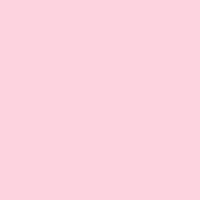

(14,42,95,185)


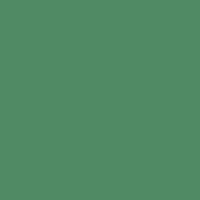

(249,70,43,228)


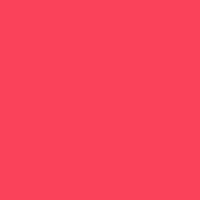

(215,168,236,208)


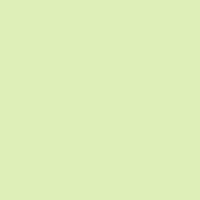

(152,226,195,189)


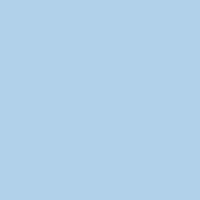

In [111]:
for i in range(5):
    [R,G,B,A]=[random.randint(0,255),random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    img = Image.new('RGBA',(200,200),(R,G,B,A))
    print(f'({R},{B},{G},{A})')
    display(img)

### Random 3D points

In [112]:
EDGES=[]

In [113]:
points = np.mgrid[1:6, 2:5, 8:10]

In [114]:
points.reshape(3, -1).T

array([[1, 2, 8],
       [1, 2, 9],
       [1, 3, 8],
       [1, 3, 9],
       [1, 4, 8],
       [1, 4, 9],
       [2, 2, 8],
       [2, 2, 9],
       [2, 3, 8],
       [2, 3, 9],
       [2, 4, 8],
       [2, 4, 9],
       [3, 2, 8],
       [3, 2, 9],
       [3, 3, 8],
       [3, 3, 9],
       [3, 4, 8],
       [3, 4, 9],
       [4, 2, 8],
       [4, 2, 9],
       [4, 3, 8],
       [4, 3, 9],
       [4, 4, 8],
       [4, 4, 9],
       [5, 2, 8],
       [5, 2, 9],
       [5, 3, 8],
       [5, 3, 9],
       [5, 4, 8],
       [5, 4, 9]])

In [117]:
import random

# Set the number of vertices
num_vertices = 10

# Generate random 3D vertices
vertices = []
for i in range(num_vertices):
  x = random.uniform(-1, 1)
  y = random.uniform(-1, 1)
  z = random.uniform(-1, 1)
  vertices.append((x, y, z))

# Connect the vertices randomly to form faces
faces = set()
for i in range(num_vertices):
  for j in range(i + 1, num_vertices):
    if random.random() > 0.5:
      # Create a face by connecting the current vertex to all
      # of the other vertices that it is connected to
      face = [i]
      for k in range(num_vertices):
        if (k != i) and ((k, i) in edges or (i, k) in edges):
          face.append(k)
      # Add the face to the set of faces
      faces.add(tuple(face))

# Print the vertices and faces
print("Vertices:", vertices)
print("Faces:", list(faces))


Vertices: [(-0.6695929040231581, -0.5171975551235757, 0.021686631130395817), (0.9209902441878157, -0.7259688601132375, -0.19408510681128632), (-0.2505216181353098, -0.37515701757128705, 0.3840607763198449), (-0.6042368328334957, -0.8945934261712025, 0.03283364903536956), (-0.608279286128073, -0.7786983332080641, 0.6460592950900419), (0.9130824880157737, -0.90134316541572, -0.04764879721055282), (-0.6100092704310078, 0.9983348596008614, 0.4497376839504086), (0.28141924447970657, 0.8756906276534657, -0.5096616569781214), (-0.7014531827768302, 0.06378936860045514, -0.8565436647091262), (-0.7885587087219332, -0.7625332999559593, -0.764843908788408)]
Faces: [(6,), (2,), (5,), (4,), (1,), (7,), (0,), (3,)]


In [156]:
import random

# Set the number of vertices
num_vertices = 10

# Generate random 3D vertices
vertices = []
for i in range(num_vertices):
  x = random.uniform(-1, 1)
  y = random.uniform(-1, 1)
  z = random.uniform(-1, 1)
  vertices.append((x, y, z))

# Connect the vertices randomly to form faces
faces = set()
for i in range(num_vertices):
  for j in range(i + 1, num_vertices):
    if random.random() > 0.5:
      # Create a face by connecting the current vertex to all
      # of the other vertices that it is connected to
      face = [i]
      print('Face1: ',face)
      for k in range(num_vertices):
        if (k != i) and (random.random() > 0.5):
          face.append(k)
          print('Face2: ',face)
      # Add the face to the set of faces
      faces.add(tuple(face))
      print('Faces: ',faces)
      print('-'*100)

# Print the vertices and faces
# print("Vertices:", vertices)
# print("Faces:", list(faces))


Face1:  [0]
Face2:  [0, 2]
Face2:  [0, 2, 3]
Face2:  [0, 2, 3, 4]
Face2:  [0, 2, 3, 4, 6]
Face2:  [0, 2, 3, 4, 6, 9]
Faces:  {(0, 2, 3, 4, 6, 9)}
----------------------------------------------------------------------------------------------------
Face1:  [0]
Face2:  [0, 4]
Face2:  [0, 4, 6]
Face2:  [0, 4, 6, 8]
Face2:  [0, 4, 6, 8, 9]
Faces:  {(0, 4, 6, 8, 9), (0, 2, 3, 4, 6, 9)}
----------------------------------------------------------------------------------------------------
Face1:  [0]
Face2:  [0, 1]
Face2:  [0, 1, 4]
Face2:  [0, 1, 4, 9]
Faces:  {(0, 1, 4, 9), (0, 4, 6, 8, 9), (0, 2, 3, 4, 6, 9)}
----------------------------------------------------------------------------------------------------
Face1:  [0]
Face2:  [0, 5]
Face2:  [0, 5, 8]
Face2:  [0, 5, 8, 9]
Faces:  {(0, 1, 4, 9), (0, 4, 6, 8, 9), (0, 5, 8, 9), (0, 2, 3, 4, 6, 9)}
----------------------------------------------------------------------------------------------------
Face1:  [0]
Face2:  [0, 2]
Face2:  [0, 2, 5]
Fac

In [128]:
print(len(faces))
lengths=[len(a) for a in faces]
l_count=[]
for l in set(lengths):
    l_count.append([l,lengths.count(l)])
l_count

23


[[2, 1], [3, 2], [4, 7], [5, 5], [6, 3], [7, 4], [8, 1]]

In more detail, the process of generating faces in a 3D mesh involves connecting the vertices in a specific way. This is typically done using a loop structure, such as a nested for loop. The outer loop iterates through the list of vertices and the inner loop iterates through the list of vertices again, starting from the vertex that follows the current vertex in the outer loop. This ensures that each pair of vertices is considered only once, since the inner loop starts at the next vertex in the list.

For each pair of vertices, the code needs to determine whether the vertices are connected. This is typically done using a random number generator, such as the random.random() function, which generates a random float between 0 and 1. If the value generated by this function is greater than a certain threshold, the vertices are considered to be connected and a face is formed.

To form the face, the current vertex is added to a list and then all of the other vertices that are connected to it are added to the list as well. This list represents the vertices that make up the face. The face is then added to a set or list, which stores all of the faces in the mesh.

This process is repeated for each pair of vertices, resulting in a set of faces that defines the shape of the mesh. The resulting faces are randomly connected, which means that the resulting mesh may not be a closed object. However, this process can be modified to generate different types of meshes with different connectivity patterns. For example, the code could be modified to ensure that the resulting mesh is a closed object by only generating faces that form a closed loop.